# 머신러닝 프레임워크 : scikit_learn
- 다양한 분류기를 지원하며, 검증하는 기능, 분류, 회귀, 클러스터링, 차원축소법이 가능하며 샘플데이터로 제공함

In [1]:
# XOR 연산 학습해보기 (값이 같을때 값을줌)
xor_input = [
[0,0,0],
[0,1,1],
[1,0,1],
[1,1,0]
]
xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [2]:
import pandas as pd

xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:,0:2] # Feature Columns(문제)
xor_lable = xor_df.iloc[:,2] # Target Columns(답)
print(xor_data)
print(xor_lable)

   0  1
0  0  0
1  0  1
2  1  0
3  1  1
0    0
1    1
2    1
3    0
Name: 2, dtype: int64


In [3]:
# 데이터 학습과 예측하기
from sklearn import svm,metrics

# instance하나 만들고 (SVC 분류 , SVR 회귀)
clf = svm.SVC()

# 학습시킴(문제, 정답) => 지도학습
clf.fit(xor_data, xor_lable)

# 예측하다.
pred = clf.predict(xor_data)
print(pred)

[0 1 1 0]


In [4]:
# 정답률 구하기
ac_scroe = metrics.accuracy_score(xor_lable, pred)
print("정답률 : ",ac_scroe)

정답률 :  1.0


In [5]:
# 정답률 구하기 : predict를 구하지 않고 정답률 구하기
# 예측률(predict) 와는 아무상관없고 과대적합과 과소적합 확인할때 사용하는것이 score
# => 전체 데이터의 점수확인할때 
clf.score(xor_data, xor_lable)

1.0

--- 
### 붓꽃의 품종 분류하기

In [6]:
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# 기본 통계량 확인하기
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# NaN확인하기
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [9]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# #  1) 품종을 컬러값으로 구분하기 위한 작업 
# iris.loc[iris['Name'] == "Iris-setosa", 'Color'] = 'red'
# iris.loc[iris['Name'] == "Iris-versicolor", 'Color'] = 'green'
# iris.loc[iris['Name'] == "Iris-virginica", 'Color'] = 'Blue'
# iris.head()

In [11]:
#  2) 품종을 컬러값으로 구분하기 위한 작업 
color_tmp = []
for name in iris['Name']:
    if name == "Iris-setosa":
        color_tmp.append('red')
    elif name == "Iris-versicolor":
        color_tmp.append('green')
    else:
        color_tmp.append('blue')
iris['Color'] = color_tmp
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [12]:
# Scatter 그려보기 (분석가가 제일 먼저 보는게 scatter임!!)
import matplotlib.pyplot as plt

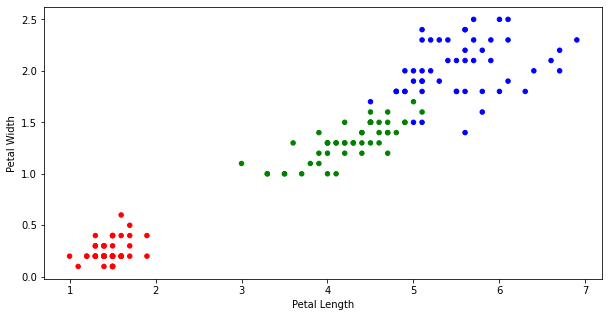

In [13]:
iris.plot(
    kind = 'scatter',
    x = 'PetalLength',
    y = 'PetalWidth',
    c = iris['Color'],
    figsize = (10, 5))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [14]:
# 머신러닝을 위한 작업
iris_data = iris[['SepalLength', "SepalWidth","PetalLength","PetalWidth"]]
iris_label = iris['Name']
print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [15]:
# 학습용 데이터와 테스트용 데이터로 나누기(얘가 나눠줘) 
from sklearn.model_selection import train_test_split

# iris_data 가 train_data, test_data를 나눠주고 iris_label가 train_label, test_label로 나눠줌
train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label)
print(train_data.head())
print(test_data.head())
print("="*20)
print(train_label.head())
print(test_label.head())

     SepalLength  SepalWidth  PetalLength  PetalWidth
1            4.9         3.0          1.4         0.2
107          7.3         2.9          6.3         1.8
39           5.1         3.4          1.5         0.2
4            5.0         3.6          1.4         0.2
53           5.5         2.3          4.0         1.3
    SepalLength  SepalWidth  PetalLength  PetalWidth
29          4.7         3.2          1.6         0.2
51          6.4         3.2          4.5         1.5
64          5.6         2.9          3.6         1.3
61          5.9         3.0          4.2         1.5
32          5.2         4.1          1.5         0.1
1          Iris-setosa
107     Iris-virginica
39         Iris-setosa
4          Iris-setosa
53     Iris-versicolor
Name: Name, dtype: object
29        Iris-setosa
51    Iris-versicolor
64    Iris-versicolor
61    Iris-versicolor
32        Iris-setosa
Name: Name, dtype: object


In [16]:
# 학습 시키기
clf = svm.SVC()
clf.fit(train_data, train_label)

SVC()

In [17]:
# 예측하기
pred = clf.predict(test_data)
print(pred[0:5])

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa']


In [18]:
# 정답률
ac_score = metrics.accuracy_score(test_label, pred)
print("정답률 :",ac_score)

정답률 : 0.9473684210526315


In [19]:
#  Training 정답률
clf.score(train_data, train_label)

0.9732142857142857

In [20]:
# Test 정답률
clf.score(test_data, test_label)

0.9473684210526315

In [21]:
# 분류 Report() : Confusion matrix (f1-score 으로 보는게 좋음!)
cl_report = metrics.classification_report(test_label, pred)
print(cl_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.86      1.00      0.92        12

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



In [22]:
# [4.1, 3.5, 1.4, 0.2] 의 품종은?
# 예측하기.
clf.predict([[4.1, 3.5, 1.4, 0.2]])

array(['Iris-setosa'], dtype=object)

---
### 분류 Report 이해하기

번호 : [1,   2,   3,   4,   5,   6]  
정답 : [음치, 음치, 음치, 음치, 정상, 정상]  
예측 : [음치, 음치, 정상, 정상, 정상, 정상]  

정확도(accuracy) : 예측이 맞은 비율?  
        1,2,5,6번은 맞추고 3,4번은 틀렸다. 6명중에 4명을 맞췄으므로  4/6 = 2/3 = 0.66 => 알고리즘 (알고리즘을 코드로 짜는것 수치해석)  
  
정밀도(precision) : 음치라고 예측한 사람들 중에 진짜 음치가 얼마나 있는가? (내가 지정한 타겟만 봐, 예측값 중심)
        내가 음치라고 예측한 1,2번이 둘다 음치가 맞았다. 2/2 = 1.0
  
재현율 : 전체 음치중에 내가 맞춘 음치의 비율은? 
        원래 음치가 4명 있는데 나는 그중에서 2명을 맞췄다. 2/4 = 0.5
  
F1 Score : 정밀도와 재현율의 평균
            2 * 정밀도 * 재현율 / (정밀도 + 재현율) = 2 * 1.0 * 0.5 /(1.0 + 0.5) = 0.66

# Python Code로 확인하기

In [23]:
import numpy as np

In [29]:
# 레이블 == 타겟 == y
# 수치값으로 줄때 내가 맞추려는 대상을(타겟) 무조건 양수로 주면됨(1),
y = np.array([1,1,1,1,0,0]) # 정답 : 1은 음치, 2는 정상
p = np.array([1,1,0,0,0,0]) # 예측

# 정확도
accuracy = np.mean(np.equal(y, p))
print('accuracy(정확도) : ',accuracy)

# 정밀도
right = np.sum(y * p == 1)
precision = right / np.sum(p)
print('precision(정밀도) :',precision)

# 재현율
recall = right / np.sum(y)
print('recall(재현율) :', recall)

# f1 Score
f1 = 2 * precision * recall / (precision + recall)
print('f1 Score : ',f1)

accuracy(정확도) :  0.6666666666666666
precision(정밀도) : 1.0
recall(재현율) : 0.5
f1 Score :  0.6666666666666666


In [34]:
# sklearn을 이용
print('accuracy : ' , metrics.accuracy_score(y, p))
print('precision : ', metrics.precision_score(y,p))
print('recall : ', metrics.recall_score(y,p))
print('f1 Score :', metrics.f1_score(y,p))

accuracy :  0.6666666666666666
precision :  1.0
recall :  0.5
f1 Score : 0.6666666666666666


In [36]:
# sklearn의 report를 이용 이걸 제일 많이 사용하신대!
print(metrics.classification_report(y,p))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

